In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [2]:
raw_data = pd.read_csv("../asset/Index2018.csv")

In [3]:
df = raw_data.copy()

### Examine the Data

In [4]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df.info() # Date is object, need to change to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [6]:
df.describe() # dax and ftse are on comparable scale, spx and nikkei are on far either side of the scale

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [8]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plotting the data

<Axes: title={'center': 'SPX Prices'}>

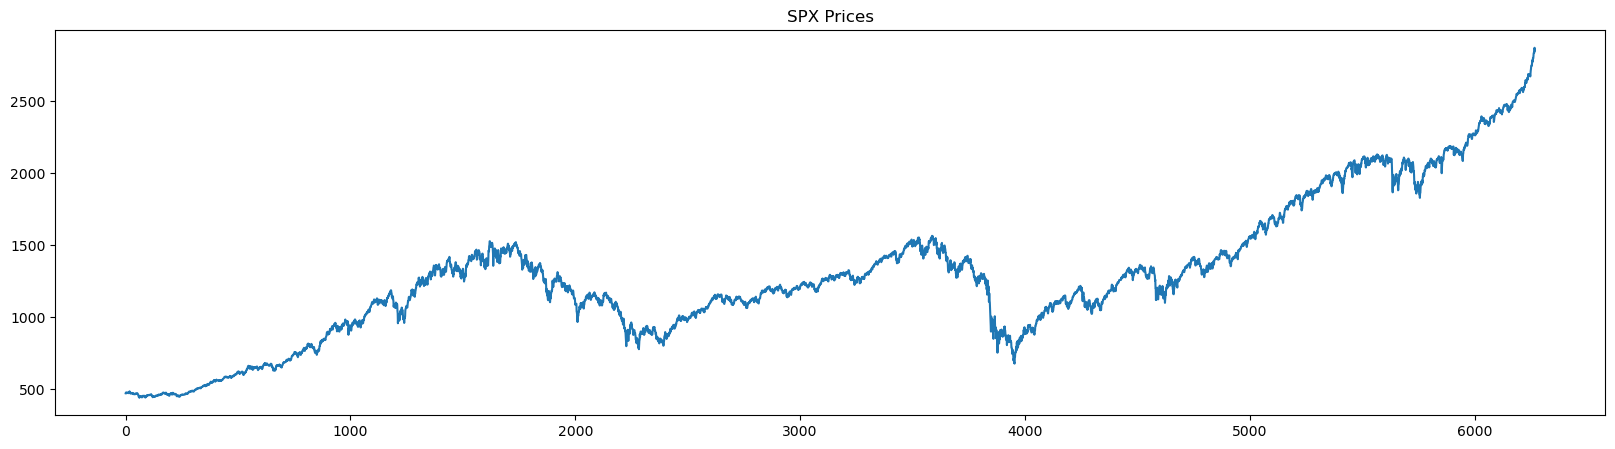

In [9]:
df.spx.plot(figsize=(20,5), title="SPX Prices") # the x-axis is the integer index of the dataframe

<Axes: title={'center': 'FTSE Prices'}>

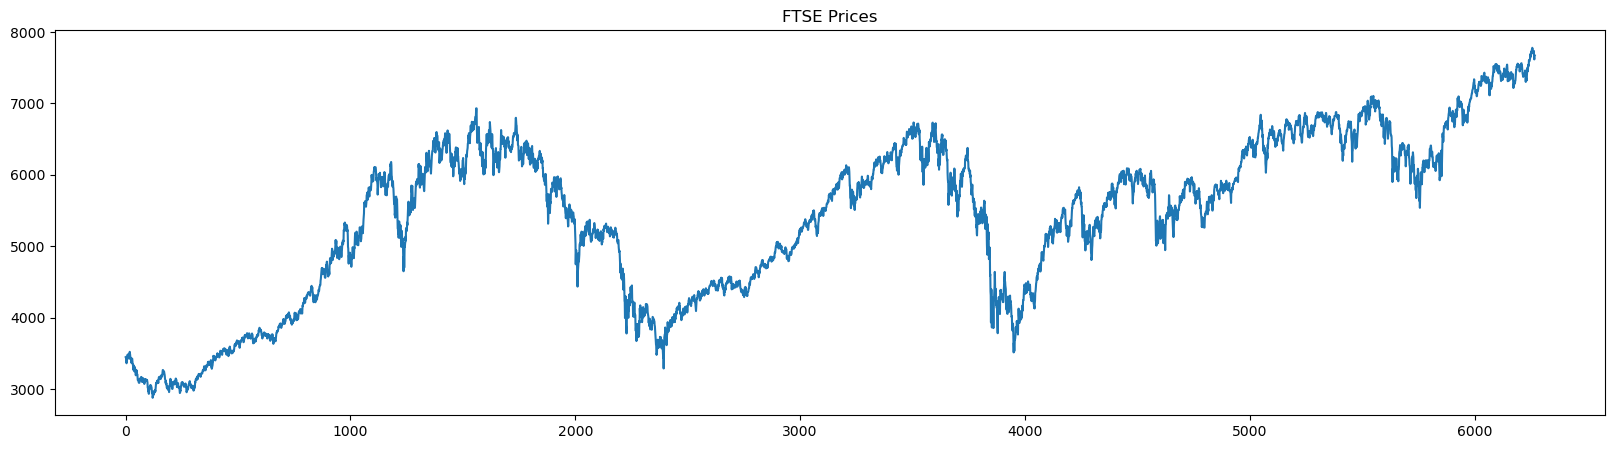

In [10]:
df.ftse.plot(figsize=(20,5), title="FTSE Prices") # the x-axis is the integer index of the dataframe

Text(0.5, 1.0, 'SPX vs FTSE')

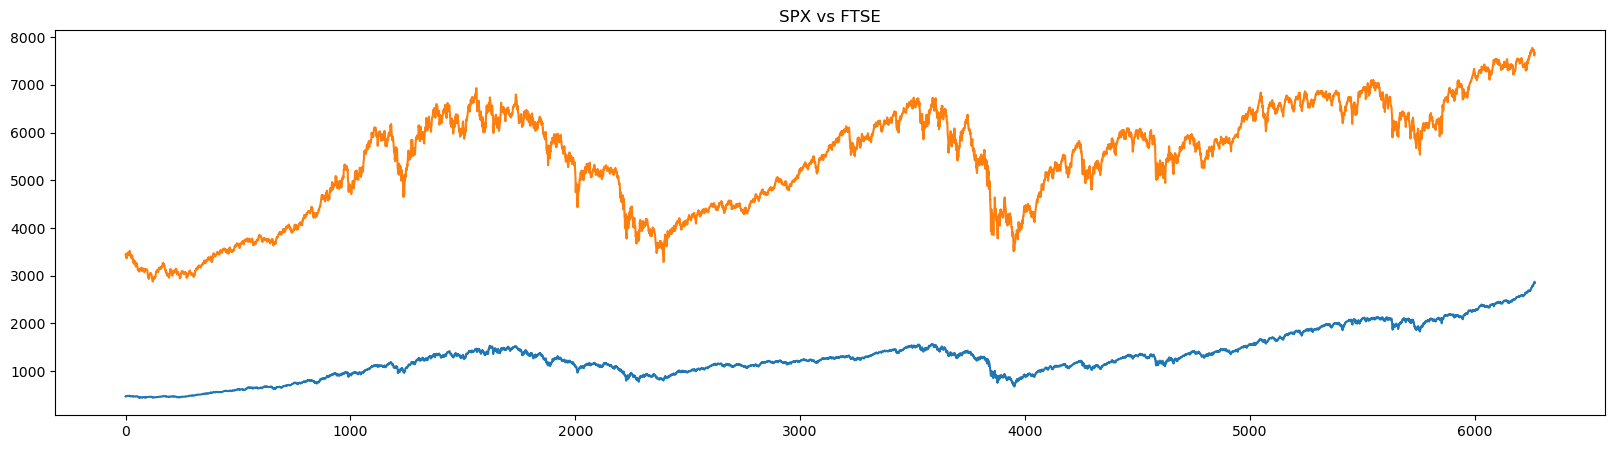

In [11]:
df.spx.plot(figsize=(20,5), title="SPX Prices") # the x-axis is the integer index of the dataframe
df.ftse.plot(figsize=(20,5), title="FTSE Prices") # the x-axis is the integer index of the dataframe
plt.title("SPX vs FTSE")

### QQ Plot

In [12]:
import scipy.stats
import pylab

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.460561028412, 1288.1275420815123, 0.9767273150948816))

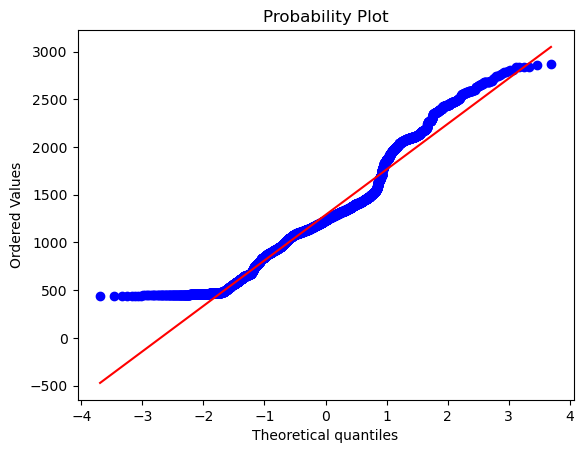

In [13]:
scipy.stats.probplot(df.spx, plot=plt)

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([2876.6     , 2899.9     , 2909.      , ..., 7762.941268,
         7769.139189, 7778.637689])),
 (1126.0991088822118, 5422.713545304514, 0.9825441776412115))

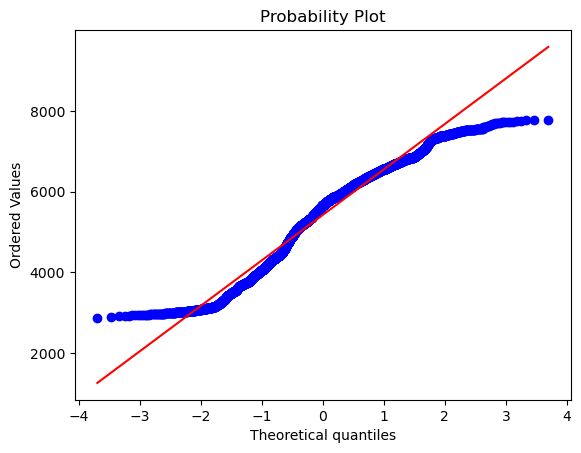

In [14]:
scipy.stats.probplot(df.ftse, plot=pylab)

### Date Conversion

In [15]:
df.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [16]:
df.date = pd.to_datetime(df.date, dayfirst=True)

In [17]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [18]:
df.date.describe()

/tmp/ipykernel_15638/1371252037.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Setting the index

In [19]:
df.set_index("date", inplace=True)

In [20]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting the desired freq

In [26]:
df = df.asfreq("d") # for the missing days in the data
df.head(10)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-15,NaN,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8789 entries, 1994-01-07 to 2018-01-29
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spx     6269 non-null   float64
 1   dax     6269 non-null   float64
 2   ftse    6269 non-null   float64
 3   nikkei  6269 non-null   float64
dtypes: float64(4)
memory usage: 343.3 KB


In [21]:
# for just the business days
df = df.asfreq('b')
df.head(10)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-17,473.30,2115.56,3407.83,18725.37
1994-01-18,474.25,2130.35,3437.01,18514.55
1994-01-19,474.30,2132.52,3475.15,19039.40


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6277 entries, 1994-01-07 to 2018-01-29
Freq: B
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spx     6269 non-null   float64
 1   dax     6269 non-null   float64
 2   ftse    6269 non-null   float64
 3   nikkei  6269 non-null   float64
dtypes: float64(4)
memory usage: 245.2 KB


### Handling Missing Data

In [23]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [24]:
df.spx = df.spx.fillna(method='ffill')
df.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [25]:
df.ftse = df.ftse.fillna(method='bfill')
df.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [26]:
df.dax = df.dax.fillna(value=df.dax.mean())
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [27]:
df.nikkei = df.nikkei.fillna(value=df.nikkei.median())
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplifying dataset

In [28]:
df["market_value"] = df.spx
df.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.605152,1288.642547
std,487.868210,2752.604984,1145.568370,4040.574533,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15028.170000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [29]:
# method 1: using the del method
del df['spx']
df.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.605152,1288.642547
std,2752.604984,1145.568370,4040.574533,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10711.090000,992.715221
50%,5774.380000,5663.300000,15028.170000,1233.761241
75%,7442.660000,6304.630175,17858.420000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [31]:
# method 2: More used; using drop method
df.drop(['dax', 'ftse', 'nikkei'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6277 entries, 1994-01-07 to 2018-01-29
Freq: B
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market_value  6277 non-null   float64
dtypes: float64(1)
memory usage: 98.1 KB


### Splitting the Data into Train and Text

In [33]:
# since we need to maintain the chronological order of the dataset
# we'll use a cutoff point
cutoff_point = int(len(df)*0.8)
cutoff_point

5021

In [34]:
df_train = df.iloc[:cutoff_point]
df_test = df.iloc[cutoff_point:]

In [35]:
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [36]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
